# 一维随机变量

## 离散随机变量
一般使用分布列表示

### 常见离散随机变量

#### 伯努利随机变量(bernoulli random variable)

<Axes: ylabel='Probability'>

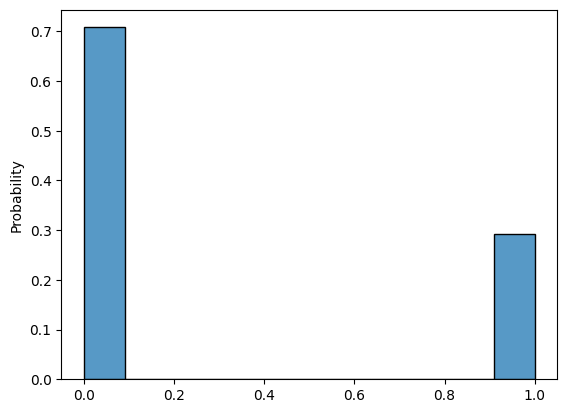

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as st
p=0.3
r = st.bernoulli.rvs(p, size=1000)
sns.histplot(r,stat='probability')

#### 二项随机变量(Binoia random variable)


二项分布的参数：n,p, 随机变量k。用 B(n,p)表示

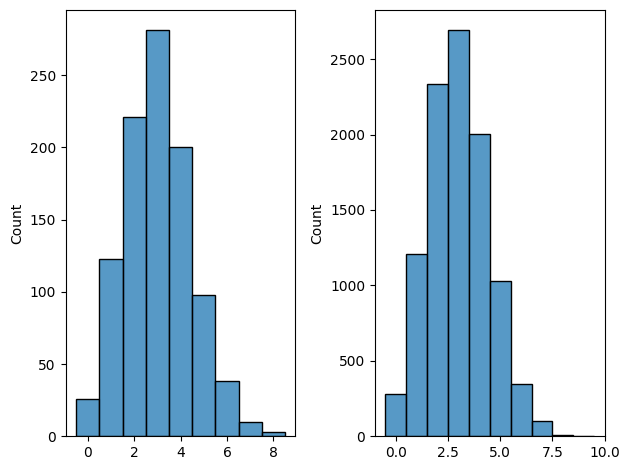

In [2]:
import numpy as np
x=np.random.binomial(10,0.3,1000)
y=np.random.binomial(10,0.3,10000)

import seaborn as sns
import matplotlib.pyplot as plt

f, axs = plt.subplots(1,2)
sns.histplot(x,discrete=True,ax=axs[0],common_bins=True) # discrete=True表示离散数据
sns.histplot(y,discrete=True,ax=axs[1],common_bins=True) # common_bins=True表示两个子图共用一个bin（即x轴的刻度）
f.tight_layout() # 用于调整子图之间的间距

#### 几何随机变量(Geometric)

> 新手保护期，第一次通过的概率较高，之后概率逐渐降低

伯努利随机变量得到正面结果的概率p,连续多次实验，直到第k次才得到正面结果

$$
p(k) = (1-p)^{k-1}p
$$


<AxesSubplot:ylabel='Probability'>

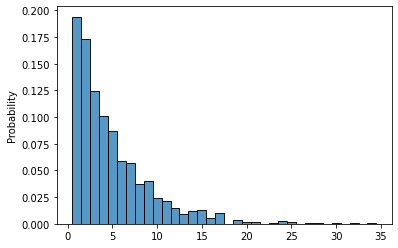

In [5]:
x=np.random.geometric(0.2,1000)
sns.histplot(x,discrete=True,stat='probability')

<AxesSubplot:ylabel='Probability'>

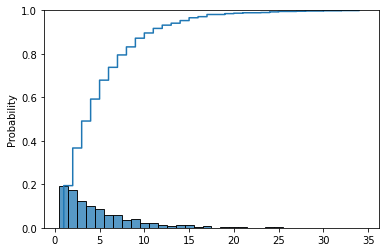

In [6]:
f, axs2 = plt.subplots(1)
sns.histplot(x,discrete=True,stat='probability')
sns.ecdfplot(x,ax=axs2)

In [7]:
import scipy.stats as st

st.geom.cdf(5, 0.2) # 第一个参数随机变量本身的值，第二个参数是函数的参数

0.67232

例题：写一个程序成功的概率是p，连写X次直到成功。X的期望值和方差？

X符合几何分布

\[ p(X) = (1-p)^{x-1}p\]

\[ E(X) = \sum_x x(1-p)^{x-1}p \]

总期望值:

$$
\begin{align*}
    E(X) &= p(x=1)E(X|x=1)+ p(x;1)E(X|x;1)\\
    &= p\cdot 1 + (1-p)(E(X)+1)\\
    &= 1/p
\end{align*}
$$

方差：

$$
\begin{align*}
    E(X^2) &= p(x=1)E(X^2|x=1)+ p(x;1)E(X^2|x;1)\\
    &= p\cdot 1 + (1-p)(E(X+1)^2)\\
    &= p+(1-p)(E(X^2)+2E(X)+1) \\
    &= \frac{2}{p^2}-\frac{1}{p}\\
    var(X) &= E(X^2)-E(X)^2 = \frac{1-p}{p^2}
\end{align*}
$$

In [1]:
import scipy.stats as st
p=0.2
mean, var, skew, kurt = st.geom.stats(p, moments='mvsk')
print(mean, var, skew, kurt)
print(1/p,(1-p)/p**2)

5.0 20.0 2.0124611797498106 6.05
5.0 19.999999999999996


<Axes: ylabel='Probability'>

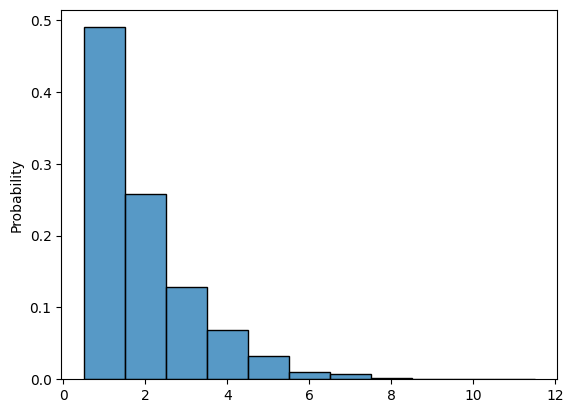

In [6]:
x = np.random.geometric(0.5,1000)
sns.histplot(x,discrete=True,stat='probability')

#### 泊松随机变量(Poisson)
若二项分布中的n很大，p很小，$\lambda = np$，二项分布逼近泊松分布

二项分布和泊松分布可以互相转化的条件：n很大，p很小，$\lambda = np$ 适中

- 当$\lambda$较小时候，泊松分布下降趋势
- 当$\lambda$较大时候，泊松分布比较像高斯分布

<Axes: ylabel='Probability'>

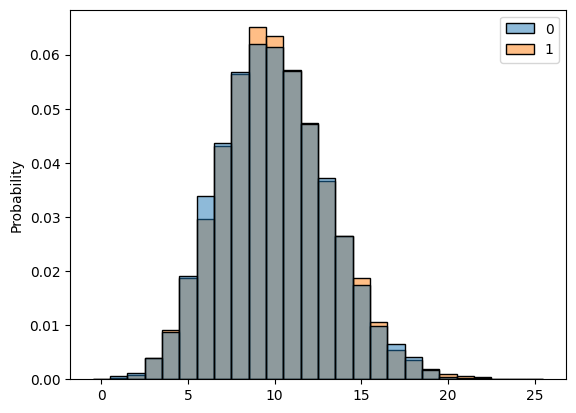

In [1]:
import numpy as np
import seaborn as sns

x=np.random.poisson(10,10000)
y=np.random.binomial(1000,0.01,10000)

sns.histplot([x,y],discrete=True,stat='probability') # 这里将[x,y]打包，可以省去一些代码

## 多维随机变量